In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load Dataset
insurance_df = pd.read_csv("insurance.csv")
insurance_df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# a. Get Shape of the data
insurance_df.shape

(1338, 7)

In [4]:
# b. Datatype of each attribute
# c. This also provides null values information
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [5]:
# According to above result, there are no null values

In [6]:
# d. 5 point summary of numerical attributes
insurance_df.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


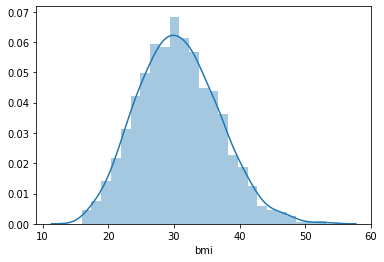

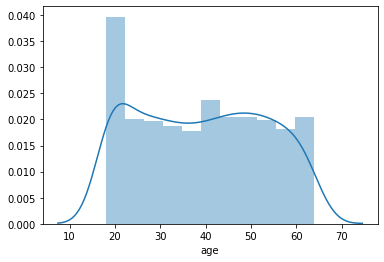

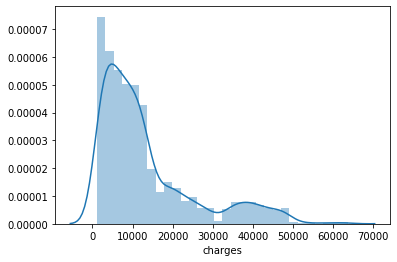

In [7]:
# e. Distribution of ‘bmi’, ‘age’ and ‘charges’ columns.
sns.distplot(insurance_df['bmi'])
plt.show()

sns.distplot(insurance_df['age'])
plt.show()

sns.distplot(insurance_df['charges'])
plt.show()

In [8]:
# f. Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns
print("Measure of skewness of ‘bmi’ :" , insurance_df['bmi'].skew())
print("Measure of skewness of ‘age’ :" , insurance_df['age'].skew())
print("Measure of skewness of ‘charges’ :" , insurance_df['charges'].skew())

Measure of skewness of ‘bmi’ : 0.2840471105987448
Measure of skewness of ‘age’ : 0.05567251565299186
Measure of skewness of ‘charges’ : 1.5158796580240388


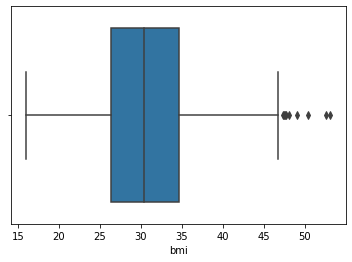

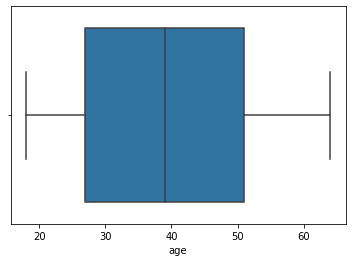

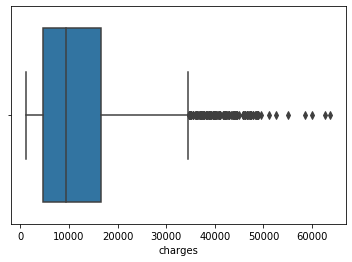

In [9]:
# g. Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges' columns
sns.boxplot(x='bmi',data=insurance_df)
plt.show()

sns.boxplot(x='age',data=insurance_df)
plt.show()

sns.boxplot(x='charges',data=insurance_df)
plt.show()

In [10]:
# According to above boxplots, bmi and charges have outliers. However, age does not have outliers

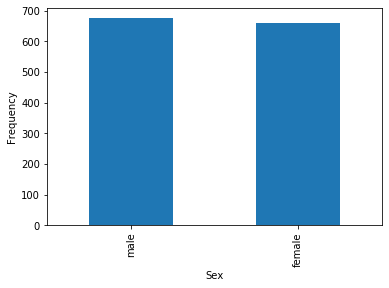

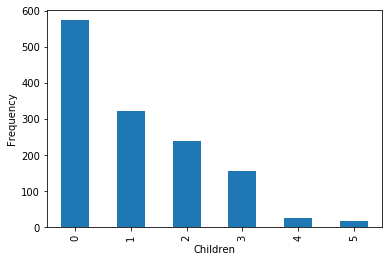

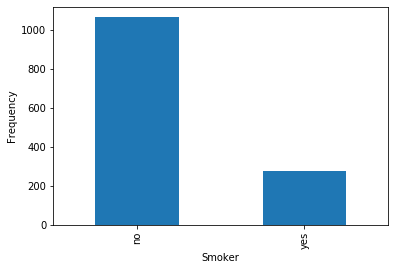

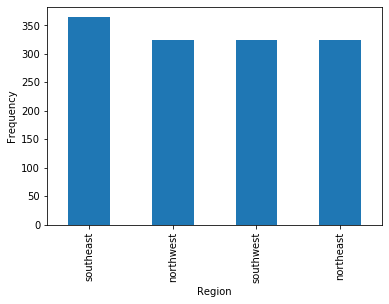

In [11]:
# h. Distribution of categorical columns (include children)

insurance_df['sex'].value_counts().plot('bar')
plt.xlabel('Sex')
plt.ylabel('Frequency')
plt.show()

insurance_df['children'].value_counts().plot('bar')
plt.xlabel('Children')
plt.ylabel('Frequency')
plt.show()

insurance_df['smoker'].value_counts().plot('bar')
plt.xlabel('Smoker')
plt.ylabel('Frequency')
plt.show()

insurance_df['region'].value_counts().plot('bar')
plt.xlabel('Region')
plt.ylabel('Frequency')
plt.show()

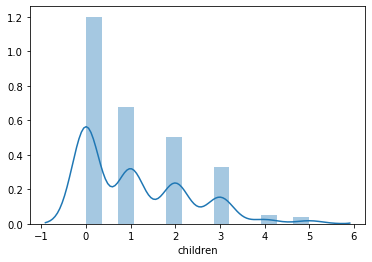

In [12]:
sns.distplot(insurance_df['children'])
plt.show()

C:\Users\Alok\Softwares\Anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Alok\Softwares\Anaconda\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


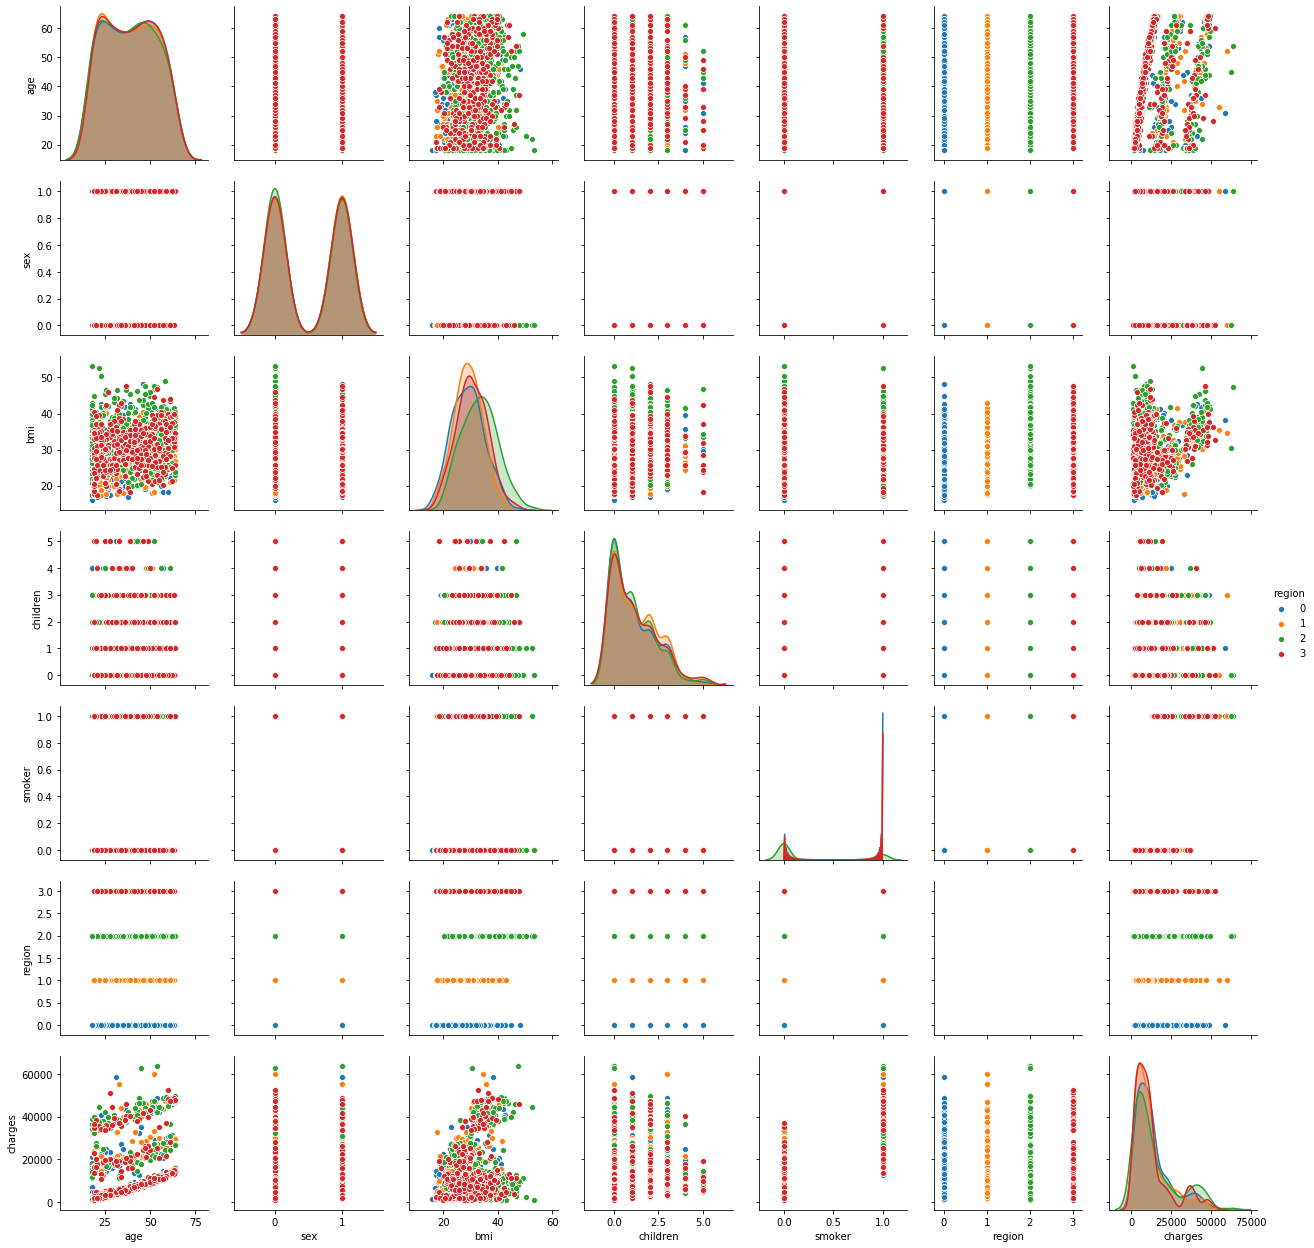

In [13]:
# i. Pair plot that includes all the columns of the dataframe
# If only numerical columns data is expected, we are good here.
# If ctegorical data is expected, then need to modify this

# Replace categorical variable 'sex' values with numerical values
insurance_df_tmp = insurance_df.replace({'sex': {"male": 0, "female": 1}})

# Replace categorical variable 'smoker' values with numerical values
insurance_df_tmp = insurance_df_tmp.replace({'smoker': {"no": 0, "yes": 1}})

# Replace categorical variable 'region' values with numerical values
insurance_df_tmp = insurance_df_tmp.replace({'region': {"northeast": 0, "northwest": 1, "southeast":2, "southwest":3}})

sns.pairplot(insurance_df_tmp, hue="region")
plt.show()

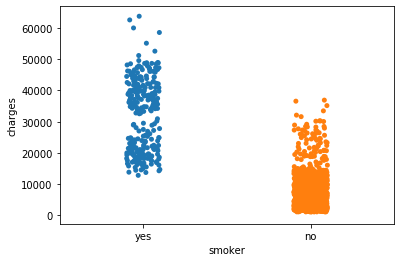

In [14]:
# a. Do charges of people who smoke differ significantly from the people who don't?

sns.stripplot(x='smoker', y='charges', data=insurance_df)
plt.show()

In [15]:
# According to graph above, Yes. Smokers have to pay more charges than non-smokers

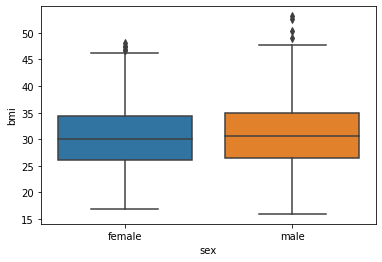

In [16]:
# b. Does bmi of males differ significantly from that of females?
sns.boxplot(x='sex', y='bmi', data=insurance_df)
plt.show()

In [17]:
# According to graph above, there is no significant difference in BMI of male and females.

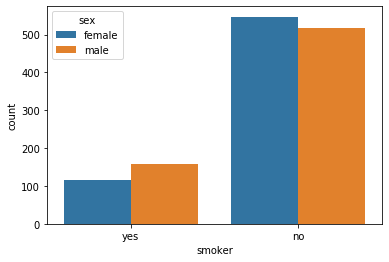

In [18]:
# c. Is the proportion of smokers significantly different in different genders?
sns.countplot(x="smoker", hue="sex", data=insurance_df)
plt.show()

In [19]:
# According to above graph, the proportion of smokers is not significantly different in different genders.

In [20]:
# d. Is the distribution of bmi across women with no children, one child and two children, the same ?
# Select data only for female
female_df = insurance_df[insurance_df['sex'] == 'female']
len(female_df)

662

In [21]:
# Group data of females according to count of children 
childrenwise_df = female_df.groupby('children')
childrenwise_df.first()

,age,sex,bmi,smoker,region,charges
children,,,,,,
0,19,female,27.900,yes,southwest,16884.92400
1,46,female,33.440,no,southeast,8240.58960
2,55,female,32.775,no,northwest,12268.63225
3,37,female,27.740,no,northwest,7281.50560
4,48,female,41.230,no,northwest,11033.66170
5,19,female,28.600,no,southwest,4687.79700


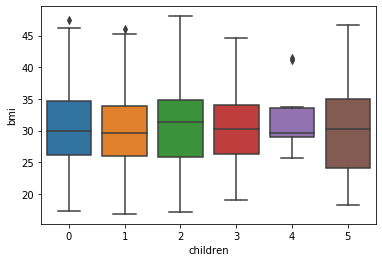

In [22]:
# Plot distribution of females data for bmi
sns.boxplot(x='children', y='bmi', data=female_df)
plt.show()

In [23]:
# According to graph above, there is no significant differnce in bmi distribution of females according to number of children